# Predavanje 5

## Sympy

In [2]:
import sympy as sp
sp.init_printing()

### Računanje s brojevima

In [7]:
x = sp.sqrt(8)
x

In [8]:
sp.srepr(x)

'Mul(Integer(2), Pow(Integer(2), Rational(1, 2)))'

In [10]:
print(x)

2*sqrt(2)


In [11]:
x.func, x.args

(sympy.core.mul.Mul, (2, sqrt(2)))

In [12]:
x.n(50)

In [13]:
x**2

### Simboli

In [23]:
x, y = sp.symbols('x, y')

In [24]:
izraz = x + 2*y

In [25]:
sp.srepr(izraz)

"Add(Symbol('x'), Mul(Integer(2), Symbol('y')))"

In [52]:
izraz.subs({x: sp.E, y: y-3})

In [43]:
izraz.n(50, subs={x:5, y:sp.pi})

### Analiza

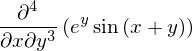

In [60]:
der = sp.Derivative(sp.sin(x+y) * sp.E**y, x, y, 3)
der

In [65]:
der = der.doit()
der

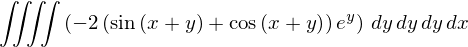

In [66]:
intg = sp.Integral(der, y, y, y, x)
intg

In [67]:
intg.doit()

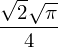

In [68]:
sp.Integral(sp.sin(x**2), (x, 0, sp.oo)).doit()

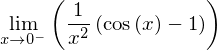

In [73]:
lim = sp.Limit((sp.cos(x) - 1) / x**2, x, 0, '-')
lim

In [74]:
lim.doit()

In [76]:
sp.Limit(3**x / 2**x, x, sp.oo).doit()

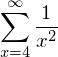

In [84]:
red = sp.Sum(x**-2, (x, 4, sp.oo))
red

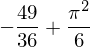

In [85]:
red.doit()

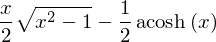

In [235]:
sp.Integral(sp.sqrt(x**2 - 1)).doit()

In [116]:
jednadžba = sp.Eq(x**3 + 8)
jednadžba

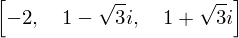

In [117]:
sp.solve(jednadžba)

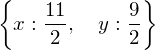

In [118]:
sp.solve([sp.Eq(x + y, 10), sp.Eq(x - y, 1)], [x, y])

In [125]:
y, t = sp.Function('y'), sp.Symbol('t')

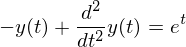

In [142]:
difj = sp.Eq(sp.Derivative(y(t), t, 2) - y(t), sp.E ** t)
difj

In [152]:
sp.classify_ode(difj, y(t))

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

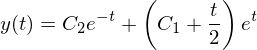

In [155]:
sp.dsolve(difj, y(t))

In [141]:
sp.Determinant(sp.Matrix([[1,2,3], [4,5,6], [1,3,4]])**-1).doit()

In [174]:
M = sp.Matrix([[1, 2, 3], [2, 2, 2], [1, 2, 3]])

In [176]:
M.eigenvals()

In [180]:
print(sp.latex(intg))

\iiiint \left(- 2 \left(\sin{\left (x + y \right )} + \cos{\left (x + y \right )}\right) e^{y}\right)\, dy\, dy\, dy\, dx


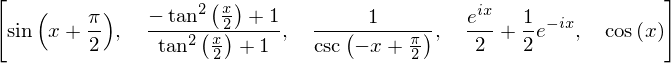

In [194]:
[sp.cos(x).rewrite(funkcija) for funkcija in (sp.sin, sp.tan, sp.csc, sp.exp, sp.acos)]

In [209]:
with sp.assuming(sp.Q.real(x), sp.Q.nonzero(x)):
    print(sp.ask(sp.Q.positive(x ** 2)))

True


In [215]:
(x**2 + 2*x + 1).equals((x+1)**2)

True

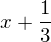

In [224]:
x + sp.S(1) / 3

In [226]:
izraz = 0
for ponavljanje in range(5):
    izraz = x ** izraz
izraz

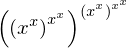

In [227]:
izraz = x
for ponavljanje in range(3):
    izraz = izraz.subs(x, x**x)
izraz

In [228]:
izraz = sp.sin(2*x) + sp.cos(2*x)

In [243]:
izraz.expand(trig=True)

In [244]:
def parcijalna_zamjena(izraz, podizraz, transformacija):
    return izraz.subs(podizraz, transformacija(podizraz))

In [245]:
parcijalna_zamjena(izraz, sp.sin(2*x), sp.expand_trig)

In [247]:
x, y = sp.symbols('x, y')
polinom = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
zamjene = {x**i : y**i for i in range(5) if not i % 2}

In [249]:
polinom.subs(zamjene)

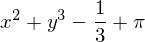

In [259]:
sp.S('x^2+y^3-1/3+pi')

In [264]:
from sympy.printing.dot import dotprint

In [272]:
from sympy.abc import a, b, c, x
print(dotprint(sp.solve(a * x**2 + b * x + c, x)[~0]))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Mul(Rational(-1, 2), Pow(Symbol(a), NegativeOne()), Add(Symbol(b), Pow(Add(Pow(Symbol(b), Integer(2)), Mul(Integer(-4), Symbol(a), Symbol(c))), Half())))_()" ["color"="black", "label"="Mul", "shape"="ellipse"];
"Rational(-1, 2)_(0,)" ["color"="black", "label"="-1/2", "shape"="ellipse"];
"Pow(Symbol(a), NegativeOne())_(1,)" ["color"="black", "label"="Pow", "shape"="ellipse"];
"Symbol(a)_(1, 0)" ["color"="black", "label"="a", "shape"="ellipse"];
"NegativeOne()_(1, 1)" ["color"="black", "label"="-1", "shape"="ellipse"];
"Add(Symbol(b), Pow(Add(Pow(Symbol(b), Integer(2)), Mul(Integer(-4), Symbol(a), Symbol(c))), Half()))_(2,)" ["color"="black", "label"="Add", "shape"="ellipse"];
"Symbol(b)_(2, 0)" ["color"="black", "label"="b", "shape"="ellipse"];
"Pow(Add(Pow(Symbol(b), Integer(2)), Mul(Integer(-4), Symbol(a), Symbol(c))), Half())_(2, 1)" ["color"="black", "label"="Pow", "shape"="ellipse"];
"Add(Pow(S

In [275]:
from IPython.display import SVG

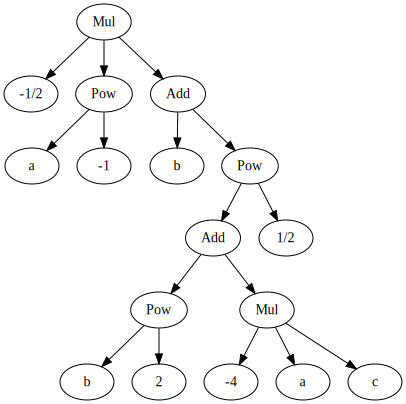

In [276]:
SVG('izraz.svg')

In [279]:
(sp.gamma(x + 2) / sp.gamma(x)).simplify()

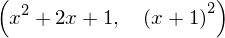

In [281]:
(x ** 2 + 2 * x + 1).simplify(), (x ** 2 + 2 * x + 1).factor()

In [285]:
((x + 1) * (x - 2) - (x + 3) * (x - 1)).expand()

In [287]:
from sympy.abc import z
(x**2*z + 4*x*y*z + 4*y**2*z).factor()

In [288]:
(sp.cos(x)**2 + sp.sin(x)**2 - 2*sp.sin(x)*sp.cos(x)).factor()

In [289]:
izraz = x*y + x - 3 + 2*x**2 - z*x**2 + x**3

In [294]:
izraz.coeff(x, 2)

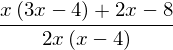

In [296]:
izraz = 1 / x + (3*x/2 - 2) / (x - 4)
izraz.together()

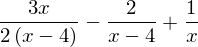

In [297]:
izraz.expand()

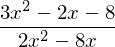

In [298]:
izraz.cancel()

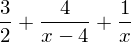

In [299]:
izraz.apart()

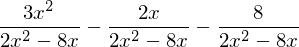

In [300]:
izraz.together().expand()

In [301]:
izraz = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)

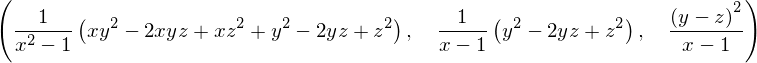

In [304]:
izraz, izraz.cancel(), izraz.factor()

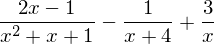

In [307]:
((4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)).apart()

In [336]:
(sp.acos(sp.cos(7)) - (7 - 2*sp.pi)).n()

In [338]:
sp.acos(sp.cos(7)).simplify()  # Krivo!

In [341]:
sp.trigsimp(sp.sinh(x)**4 - sp.cosh(x)**4)

In [348]:
sp.expand_trig(sp.cos(1 - x))

In [349]:
sp.trigsimp(_)

In [351]:
from sympy.abc import a, b, c, x, y, z

In [352]:
sp.powsimp(x**a * x**b)

In [358]:
sp.powsimp(2**a * 3**a)

In [362]:
ar, br, cr, xr, yr, zr = sp.symbols('a b c x y z', real=True)

In [369]:
ap, bp, cp, xp, yp, zp = sp.symbols('a b c x y z', nonnegative=True)

In [370]:
sp.powsimp(xp ** ar * yp ** ar)

In [371]:
sp.powsimp(x ** a * y ** a, force=True)

In [376]:
sp.powsimp(x ** 2 * y ** 2)

In [377]:
sp.expand_power_exp(x ** (a + b))

In [379]:
sp.expand_power_base((xp * yp) ** ar)

In [384]:
sp.powdenest((xp**ar)**br)

In [385]:
bi = sp.Symbol('b', integer=True)

In [386]:
sp.powdenest((x**a)**bi)

In [394]:
from sympy.abc import x, y
xp, yp = sp.symbols('x y', positive=True)
sp.expand_log(sp.log(xp * yp))

In [395]:
sp.exp(sp.log(x))

In [396]:
sp.log(sp.exp(x))

In [398]:
sp.expand_log(sp.log(xp ** ar))

In [400]:
sp.logcombine(2 * sp.log(xp))

In [406]:
sp.Eq(sp.factorial(x), sp.gamma(x + 1))

In [407]:
_.simplify()

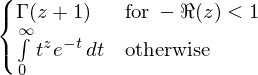

In [410]:
sp.Integral(t**z * sp.E**-t, (t, 0, sp.oo)).doit()

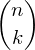

In [413]:
from sympy.abc import n, k
sp.binomial(n, k)

In [415]:
sp.gamma(x).rewrite(sp.factorial)

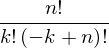

In [416]:
sp.binomial(n, k).rewrite(sp.factorial)

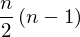

In [422]:
sp.combsimp(sp.binomial(n, n-2))

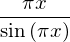

In [423]:
sp.combsimp(sp.factorial(x) * sp.factorial(-x))

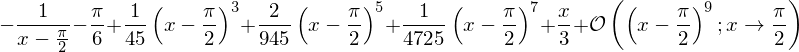

In [432]:
sp.series(sp.tan(x), x, sp.pi / 2, 9)

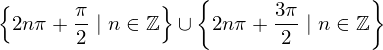

In [442]:
sp.solveset(sp.cos(x), x)

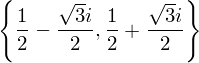

In [444]:
sp.solveset(x**2 - x + 1, x)

In [447]:
sp.solveset(sp.Eq(x - y, x + y + 2), x)

In [448]:
sp.solveset?

In [452]:
sp.solveset(sp.sin(x) < 0, x, sp.S.Reals)  # Krivo!